<a href="https://colab.research.google.com/github/rushanmukherjee/GeospatialDataAnalytics/blob/main/Alternative_WorldMap_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install geodatasets

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import geodatasets

In [12]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [26]:
print(world.keys().to_list())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [13]:
# Create a copy of the original GeoDataFrame
world_modified = world.copy()

In [14]:
world_modified.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [33]:
row1 = world_modified.iloc[8]
print(row1.to_string())

featurecla                                      Admin-0 country
scalerank                                                     1
LABELRANK                                                     2
SOVEREIGNT                                            Indonesia
SOV_A3                                                      IDN
ADM0_DIF                                                      0
LEVEL                                                         2
TYPE                                          Sovereign country
TLC                                                           1
ADMIN                                                 Indonesia
ADM0_A3                                                     IDN
GEOU_DIF                                                      0
GEOUNIT                                               Indonesia
GU_A3                                                       IDN
SU_DIF                                                        0
SUBUNIT                                 

In [15]:
# Compute the area of each country and take the logarithm of the areas
areas = [geo.area for geo in world_modified['geometry'].to_list()]
areas_logs = [math.log(a) for a in areas]

In [27]:
# Update the geometry column by turning each geometry into its centroid and then buffering it
world_modified['geometry'] = [g.centroid.buffer(areas_logs[index]) for index,g in enumerate(world_modified['geometry'].to_list())]

<Axes: >

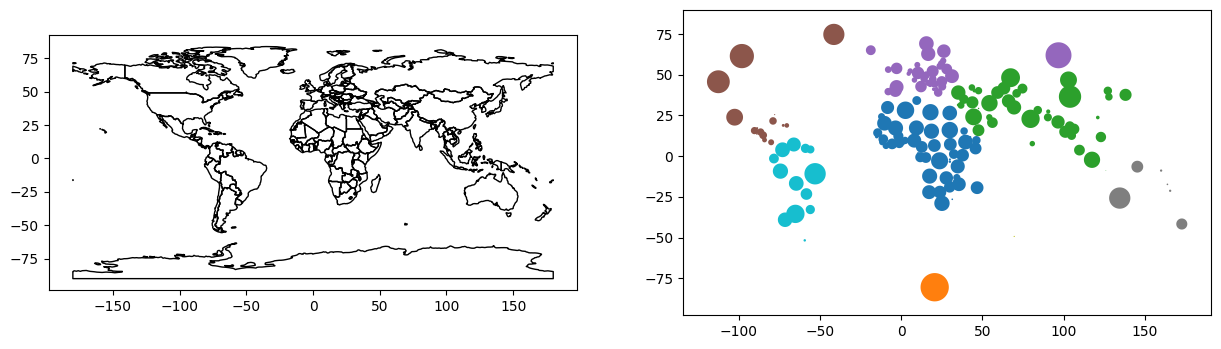

In [34]:
# Plot the original and modified world map

f,ax = plt.subplots(1,2, figsize=(15,10))
world.plot(ax=ax[0], color='none', edgecolor='k', linewidth=1)
world_modified.plot(ax=ax[1], column='CONTINENT', cmap='tab10')

### Consolidated Map

<Axes: >

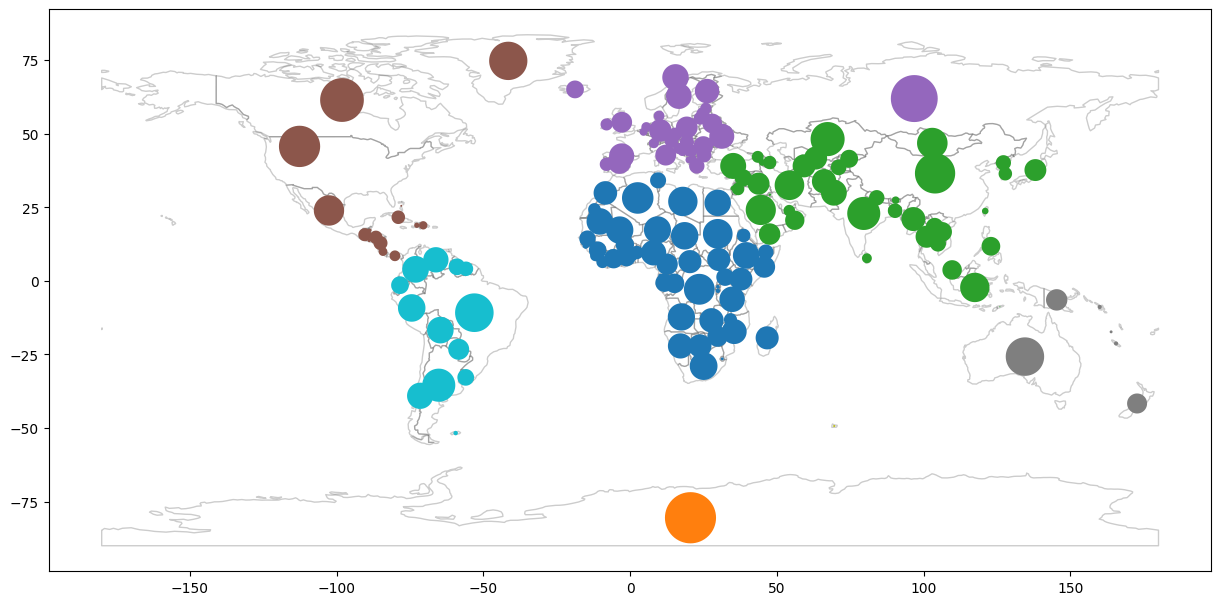

In [35]:
# Plot the original and modified world map TOGETHER

f,ax = plt.subplots(1,1, figsize=(15,10))
world.plot(ax=ax, color='none', edgecolor='k', linewidth=1, alpha=0.2)
world_modified.plot(ax=ax, column='CONTINENT', cmap='tab10')